# IDRIM - Extended Drude Model Relationships

## 1. Introduction
This file contains all relations that are used in the multitude of Two Temperature Models that can be simulated using PyDRIM3. Laser parameters set here do not carry over to the Models file, so keep that in mind. This file is primarily for having these relationships graphed but not taking up lots of room in one file where all the models take up enough room as is.

## 2. Module Import , Laser Parameters and Initial Setup

In [1]:
from IDRIM.constants import *
from IDRIM.relations import *
from IDRIM.graph import *
from IDRIM.commons import *
from IDRIM.checks import *
from IDRIM.checks import *
from IDRIM.genesis import *
from IDRIM.ymodcom import *

from numpy import inf

In [2]:
Parameters={'wavelength':1417*nm, 'pulse':104e-15, 'angle':0, 'thick':[inf, 407, 11000, inf], 'Res':100}

In [3]:
mu_array, Cp_array, Ce_array, wp_array, RI_array, Fit = Regeneration(Parameters, OVERRIDE=1)

OVERRIDE Detected. Regenerating.
Solving Chemical Potential. This may take some time.
Mu Generated and Saved.
Generating Phonon Heat Capacity.
Phonon Heat Capacity generated and saved.
Generating Electron Heat Capacity.
Electron Heat Capacity generated and saved.
Generating Plasma Frequency
Plasma Frequency array generated and saved.
Generating Refractive Index.
Refractive Index array generated and saved.


REGENERATION COMPLETE.


In [4]:
M_GraphStaple()

## 3. Energy Dispersion Relations

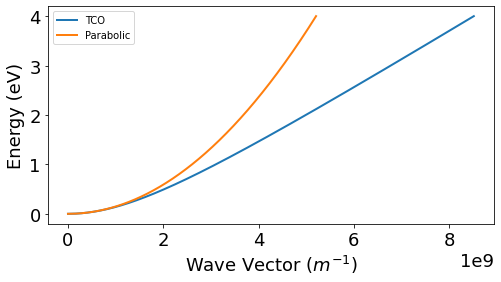

In [5]:
TCO_array, parabolic_array = GenDispersionArrays()
GraphDispersion(TCO_array, parabolic_array)

## 4. Density of States

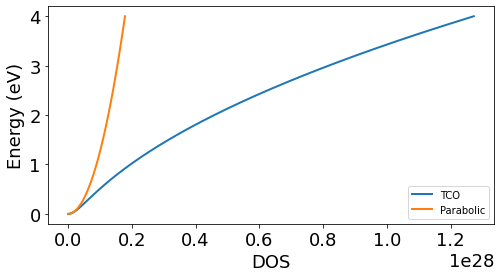

In [6]:
TCO_DOS_array, para_DOS_array = GenDOSArrays()
GraphDOS(TCO_DOS_array, para_DOS_array)

## 5. Chemical Potential

Chemical Potential at 300K: 0.9987864447995082 eV


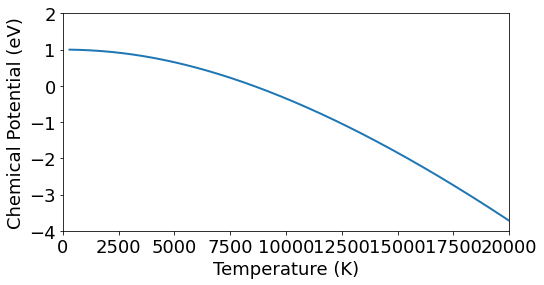

In [7]:
GraphMu(mu_array)
print("Chemical Potential at 300K:", mu_array[0]/eV, "eV")

## 6. Phonon Heat Capacity

$$C_p =9 N k_{\mathrm{B}}\left(\frac{T}{T_D}\right)^{3} \int_0^{T_D/T}\frac{x^4 \exp[x]}{(\exp[x]-1)^{2}} dx$$



$$C_p' = 2.6\times 10^6$$

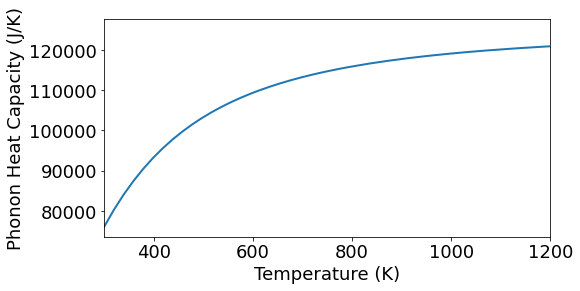

In [8]:
GraphPhononHC(Cp_array)

## 7. Electron Heat Capacity

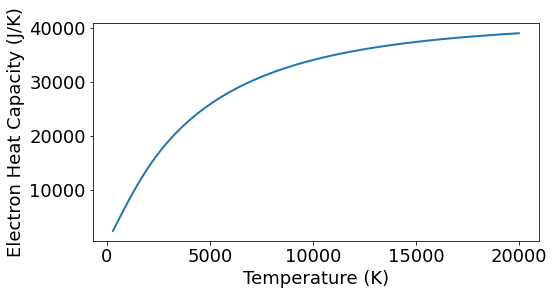

In [9]:
GraphElectronHC(Ce_array)

## 8. Effective Mass

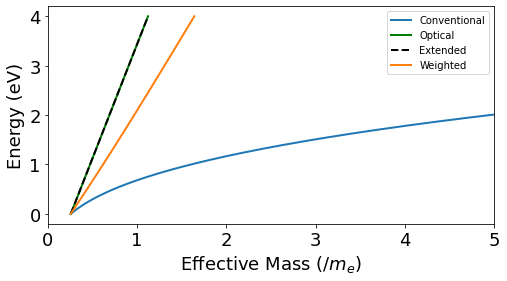

In [10]:
Ext = EffMassExtended(energy_array)
Con = EffMassConventional(energy_array)
Opt = EffMassOptical(energy_array)
Wei = EffMassWeighted(energy_array)
GraphEffectiveMass(Ext, Opt, Con, Wei)

## 9. Average Effective Mass

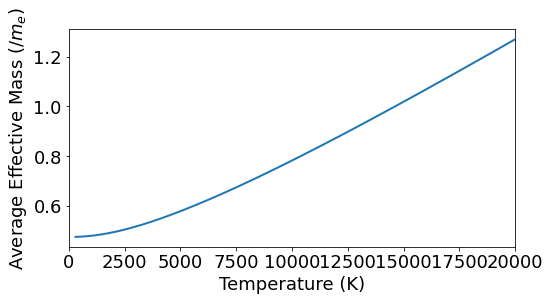

In [11]:
GraphAvgEffMass(GenAvgEffMass(mu_array, DEX=0))

## 10. Plasma Frequency

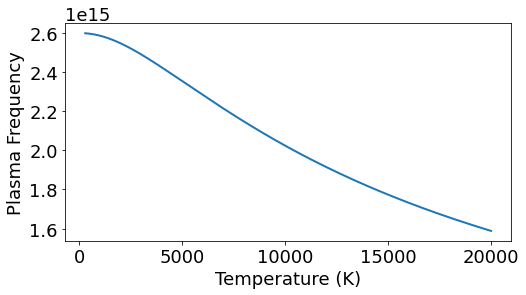

In [12]:
GraphPlasmaFrequency(wp_array)

## 11. Refractive Index

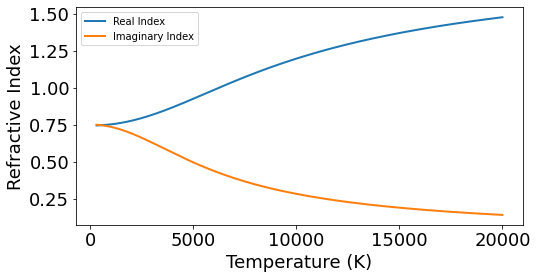

In [13]:
GraphRefractiveIndex(RI_array)

## Fabry-Perot Interference Pattern

In [14]:
Thick_array = np.linspace(10000, 12000, DIM)
R = np.zeros(DIM)
T = np.zeros(DIM)
A = np.zeros(DIM)

for i in range(DIM):
    Thicks = [inf, Parameters['thick'][1], Thick_array[i], inf]
    R[i], T[i], A[i] = TMM_Run(RI_array[0], Parameters['wavelength'], Thicks, 0)

Text(0, 0.5, 'Transmission')

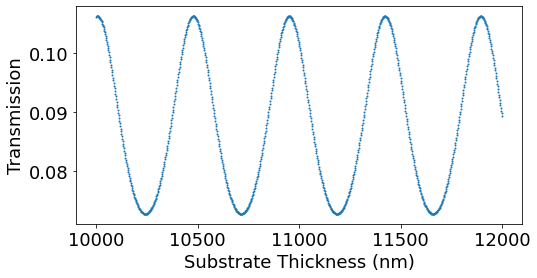

In [15]:
plt.scatter(Thick_array, T, s=1)
plt.xlabel("Substrate Thickness (nm)")
plt.ylabel("Transmission")

In [18]:
#2*pumpf/c*n.imag
print(1/2*2)
print((1/2)*2)
print(1/(2*2))

1.0
1.0
0.25
